![](https://import.cdn.thinkific.com/220744/BExaQBPPQairRWFqxFbK_logo_mastermind_web_png)


¡Ahora es **vuestro turno!**

En este proyecto final os he adjuntado un Dataset con 27.075 juegos en **Steam**, la popular plataforma de juegos de PC. Esta lista está actualizada desde el inicio hasta Abril de 2019.

Ya que tenéis los conocimientos, os pediré que me contestéis a **10 preguntas**:

1. Cual es el TOP10 de juegos más jugados?
2. Cuál es el género de videojuegos más vendido?
3. Qué géneros tienen mejores reviews de media?
4. Cuánto ha ganado el desarrollador que más juegos ha vendido?
5. Cómo afecta a las reviews que un juego sea Early Access?
6. Cuál es el desarrollador (o desarrolladores) que más tipos de juego y cantidad ha desarrollado?
7. En qué mes, desde que tenemos datos, se han publicado más juegos?
8. Cuántas horas se juega de media a cada tipo de juego mensualmente?
9. Los juegos Free to Play tienen mejores o peores reviews?
10. Cómo ha evolucionado el número de achievements (trofeos) por juego?

Os dejamos via libre para contestar a estas preguntas como más os apetezca. Recordad que no hay nada de malo en consultar por internet si tenéis dudas. Las documentaciones oficiales o [Stack Overflow](https://stackoverflow.com/) son sitios geniales para ello!

Al acabar este proyecto, publicadlo en el foro donde está colgado para ver quién es el mejor!

Os dejo la guía de pasos a seguir.

Muchos ánimos!!


# Importando librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Consiguiendo los datos

### Conseguir path

In [2]:
path = "Data/SteamDataset-220424-201858.zip"

### Descomprimir el archivo

In [3]:
from zipfile import ZipFile

In [4]:
steam_zip = ZipFile(path)

In [5]:
steam_zip.filelist

[<ZipInfo filename='steam.csv' compress_type=deflate external_attr=0x20 file_size=3425223 compress_size=979195>]

### Construir DataFrame

In [6]:
steam_df = pd.read_csv(steam_zip.open('steam.csv'), index_col=[0])

In [7]:
steam_df.head()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
0,Counter-Strike,2000-11-01,Valve,0,124534,3339,17612,7.19€,15000000.0,True,False,False,False,False,False,False,False
1,Team Fortress Classic,1999-04-01,Valve,0,3318,633,277,3.99€,7500000.0,True,False,False,False,False,False,False,False
2,Day of Defeat,2003-05-01,Valve,0,3416,398,187,3.99€,7500000.0,True,False,False,False,False,False,False,False
3,Deathmatch Classic,2001-06-01,Valve,0,1273,267,258,3.99€,7500000.0,True,False,False,False,False,False,False,False
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,0,5250,288,624,3.99€,7500000.0,True,False,False,False,False,False,False,False


# Limpieza y manipulación de datos

## Quitar datos duplicados o irrelevantes

In [8]:
steam_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27098     True
27099     True
27100     True
27101     True
27102     True
Length: 27103, dtype: bool

In [9]:
steam_df.duplicated().unique()

array([False,  True])

In [10]:
steam_df = steam_df.drop_duplicates()

In [11]:
steam_df.duplicated().unique()

array([False])

## Arreglar errores estructurales

In [12]:
steam_df.head()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
0,Counter-Strike,2000-11-01,Valve,0,124534,3339,17612,7.19€,15000000.0,True,False,False,False,False,False,False,False
1,Team Fortress Classic,1999-04-01,Valve,0,3318,633,277,3.99€,7500000.0,True,False,False,False,False,False,False,False
2,Day of Defeat,2003-05-01,Valve,0,3416,398,187,3.99€,7500000.0,True,False,False,False,False,False,False,False
3,Deathmatch Classic,2001-06-01,Valve,0,1273,267,258,3.99€,7500000.0,True,False,False,False,False,False,False,False
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,0,5250,288,624,3.99€,7500000.0,True,False,False,False,False,False,False,False


### Definir errores

Recuerda hacer una exploración de datos para encontrar estos errores. Os confirmo que hay unos cuantos!


In [13]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27075 entries, 0 to 27074
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                27075 non-null  object 
 1   release_date        27075 non-null  object 
 2   developer           27075 non-null  object 
 3   achievements        27075 non-null  int64  
 4   positive_ratings    27075 non-null  int64  
 5   negative_ratings    27075 non-null  int64  
 6   avg_hours_per_user  27075 non-null  int64  
 7   price               27075 non-null  object 
 8   sells               27075 non-null  float64
 9   action              27075 non-null  bool   
 10  adventure           27075 non-null  bool   
 11  rpg                 27075 non-null  bool   
 12  simulation          27075 non-null  bool   
 13  strategy            27075 non-null  bool   
 14  racing              27075 non-null  bool   
 15  free_to_play        27075 non-null  bool   
 16  earl

In [14]:
steam_df['release_date'] = pd.to_datetime(steam_df['release_date'])

In [15]:
steam_df['price'] = steam_df['price'].str.replace('€', '')

In [16]:
steam_df['price'] = pd.to_numeric(steam_df['price'])

In [17]:
steam_df['sells'] = steam_df['sells'].astype(int)

In [18]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27075 entries, 0 to 27074
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                27075 non-null  object        
 1   release_date        27075 non-null  datetime64[ns]
 2   developer           27075 non-null  object        
 3   achievements        27075 non-null  int64         
 4   positive_ratings    27075 non-null  int64         
 5   negative_ratings    27075 non-null  int64         
 6   avg_hours_per_user  27075 non-null  int64         
 7   price               27075 non-null  float64       
 8   sells               27075 non-null  int32         
 9   action              27075 non-null  bool          
 10  adventure           27075 non-null  bool          
 11  rpg                 27075 non-null  bool          
 12  simulation          27075 non-null  bool          
 13  strategy            27075 non-null  bool      

## Filtrar outliers 

In [19]:
steam_df.describe()

,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells
count,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04
mean,45.248864,1.000559e+03,211.027147,149.804949,6.078193,1.340905e+05
std,352.670281,1.898872e+04,4284.938531,1827.038141,7.874922,1.328089e+06
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+04
25%,0.000000,6.000000e+00,2.000000,0.000000,1.690000,1.000000e+04
50%,7.000000,2.400000e+01,9.000000,0.000000,3.990000,1.000000e+04
75%,23.000000,1.260000e+02,42.000000,0.000000,7.190000,3.500000e+04
max,9821.000000,2.644404e+06,487076.000000,190625.000000,421.990000,1.500000e+08


In [20]:
zero_count = steam_df['avg_hours_per_user'].value_counts()[0]
print(f'cero se repite como valor {zero_count} veces en avg_hours_per_user')

cero se repite como valor 20905 veces en avg_hours_per_user


## Lidiar con NANs

In [21]:
steam_df.isna().any()

name                  False
release_date          False
developer             False
achievements          False
positive_ratings      False
negative_ratings      False
avg_hours_per_user    False
price                 False
sells                 False
action                False
adventure             False
rpg                   False
simulation            False
strategy              False
racing                False
free_to_play          False
early_access          False
dtype: bool

## Validar nuestros datos

In [22]:
steam_df.tail()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
27070,Room of Pandora,2019-04-24,SHEN JIAWEI,7,3,0,0,2.09,10000,False,True,False,False,False,False,False,False
27071,Cyber Gun,2019-04-23,Semyon Maximov,0,8,1,0,1.69,10000,True,True,False,False,False,False,False,False
27072,Super Star Blast,2019-04-24,EntwicklerX,24,0,1,0,3.99,10000,True,False,False,False,False,False,False,False
27073,New Yankee 7: Deer Hunters,2019-04-17,Yustas Game Studio,0,2,0,0,5.19,10000,False,True,False,False,False,False,False,False
27074,Rune Lord,2019-04-24,Adept Studios GD,0,4,0,0,5.19,10000,False,True,False,False,False,False,False,False


# EDA

## Cual es el TOP10 de juegos más jugados?

In [23]:
top_played_df = steam_df[['name', 'sells', 'avg_hours_per_user']].copy()

In [24]:
top_played_df['total_hours_played'] = top_played_df['sells'] * \
    top_played_df['avg_hours_per_user']

In [25]:
top_played_df.sort_values(by='total_hours_played',
                          ascending=False, inplace=True)

In [26]:
top_ten_df = top_played_df.head(10).copy().reset_index(drop=True)

In [27]:
top_ten_df

,name,sells,avg_hours_per_user,total_hours_played
0,Dota 2,150000000,23944,3591600000000
1,PLAYERUNKNOWN'S BATTLEGROUNDS,75000000,22938,1720350000000
2,Counter-Strike: Global Offensive,75000000,22494,1687050000000
3,Team Fortress 2,35000000,8495,297325000000
4,Counter-Strike,15000000,17612,264180000000
5,Warframe,35000000,5845,204575000000
6,Garry's Mod,15000000,12422,186330000000
7,Grand Theft Auto V,15000000,9837,147555000000
8,Unturned,35000000,3248,113680000000
9,The Elder Scrolls V: Skyrim,15000000,7089,106335000000


In [28]:
top_ten_df.loc[1, 'name'] = 'PUBG'
top_ten_df.loc[2, 'name'] = 'CS:GO'
top_ten_df.loc[7, 'name'] = 'GTA V'
top_ten_df.loc[9, 'name'] = 'Skyrim'

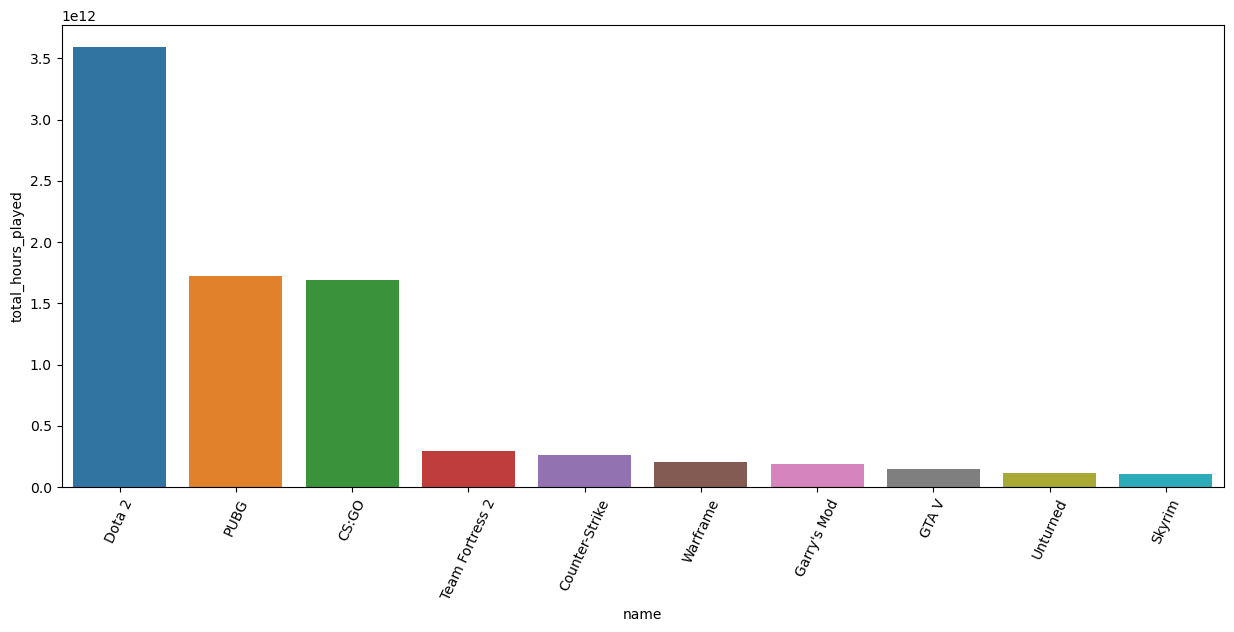

In [29]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=65)

sns.barplot(x='name', y='total_hours_played', data=top_ten_df)

plt.show()

## Cuál es el género de videojuegos más vendido?

In [30]:
list(steam_df.columns)

['name',
 'release_date',
 'developer',
 'achievements',
 'positive_ratings',
 'negative_ratings',
 'avg_hours_per_user',
 'price',
 'sells',
 'action',
 'adventure',
 'rpg',
 'simulation',
 'strategy',
 'racing',
 'free_to_play',
 'early_access']

In [31]:
grouped_genres = steam_df.groupby(['action', 'adventure', 'rpg', 'simulation', 'strategy',
                                  'racing', 'free_to_play',  'early_access'])['sells'].sum().reset_index(name='total_sells')

In [32]:
genres = grouped_genres.sort_values(by='total_sells', ascending=False)[
    ['action', 'adventure', 'rpg', 'simulation', 'strategy', 'racing', 'free_to_play', 'early_access', 'total_sells']][:5]

In [33]:
genres_name = genres.drop(['total_sells'], axis=1)

In [34]:
genres_name['genre'] = genres_name.apply(
    lambda x: ', '.join(x.index[x]), axis=1)

In [35]:
genres['genre'] = genres_name['genre']

In [36]:
top_genres = genres[['genre', 'total_sells']]

In [37]:
top_genres

,genre,total_sells
88,action,699450000
136,"action, adventure",400315000
90,"action, free_to_play",354275000
48,adventure,191015000
8,strategy,186130000


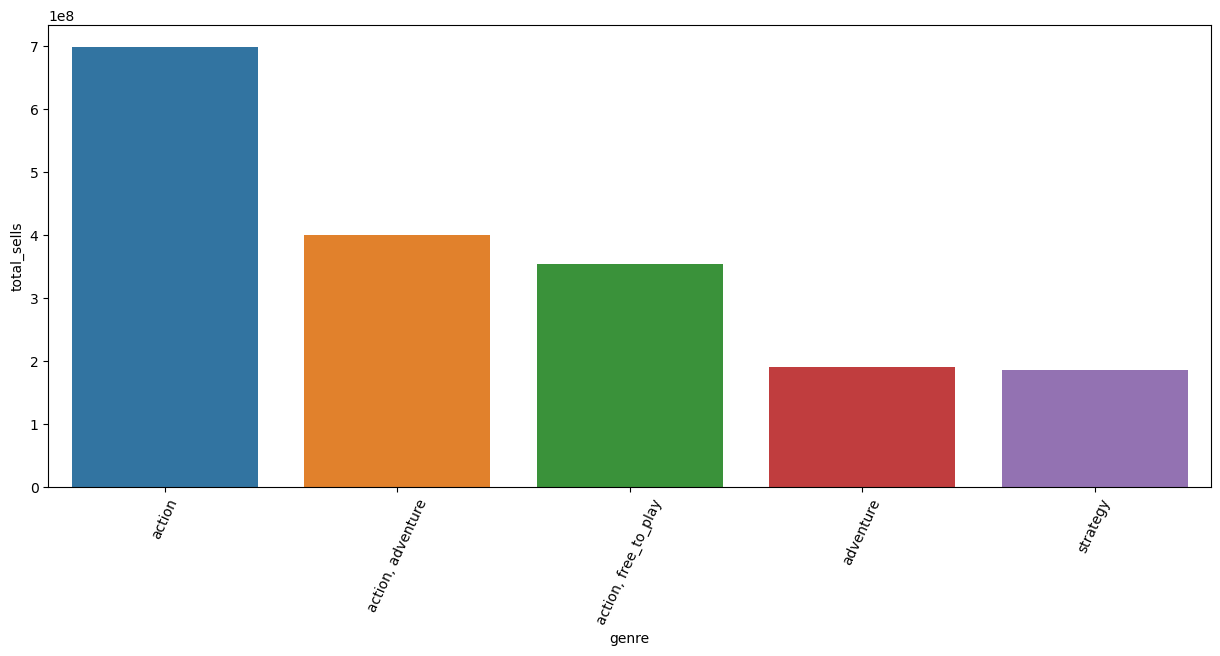

In [38]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=65)

sns.barplot(x='genre', y='total_sells', data=top_genres)

plt.show()

## Qué géneros tienen mejores reviews de media?

In [39]:
steam_df.head()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
0,Counter-Strike,2000-11-01,Valve,0,124534,3339,17612,7.19,15000000,True,False,False,False,False,False,False,False
1,Team Fortress Classic,1999-04-01,Valve,0,3318,633,277,3.99,7500000,True,False,False,False,False,False,False,False
2,Day of Defeat,2003-05-01,Valve,0,3416,398,187,3.99,7500000,True,False,False,False,False,False,False,False
3,Deathmatch Classic,2001-06-01,Valve,0,1273,267,258,3.99,7500000,True,False,False,False,False,False,False,False
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,0,5250,288,624,3.99,7500000,True,False,False,False,False,False,False,False


In [40]:
reviews_df = steam_df[['positive_ratings', 'negative_ratings', 'action',
                       'adventure', 'rpg', 'simulation', 'strategy', 'racing']].copy()

In [41]:
reviews_df['total_ratings'] = reviews_df[[
    'positive_ratings', 'negative_ratings']].sum(axis=1)
reviews_df['positive_average'] = reviews_df['positive_ratings'] / \
    reviews_df['total_ratings']

In [42]:
reviews_grouped = reviews_df.groupby(['action', 'adventure', 'rpg', 'simulation', 'strategy',
                                      'racing'])['positive_average'].mean().reset_index(name='positive_average')

In [43]:
genre_list = ['action', 'adventure', 'rpg', 'simulation', 'strategy',
              'racing']

In [44]:
top_genre_ratigs = reviews_grouped.sort_values(by='positive_average', ascending=False)[
    ['action', 'adventure', 'rpg', 'simulation', 'strategy', 'racing', 'positive_average']][:5]

In [45]:
genres_name = top_genre_ratigs.drop(['positive_average'], axis=1)

In [46]:
genres_name['genre'] = genres_name.apply(
    lambda x: ', '.join(x.index[x]), axis=1)

In [47]:
top_genre_ratigs['genre'] = genres_name['genre']

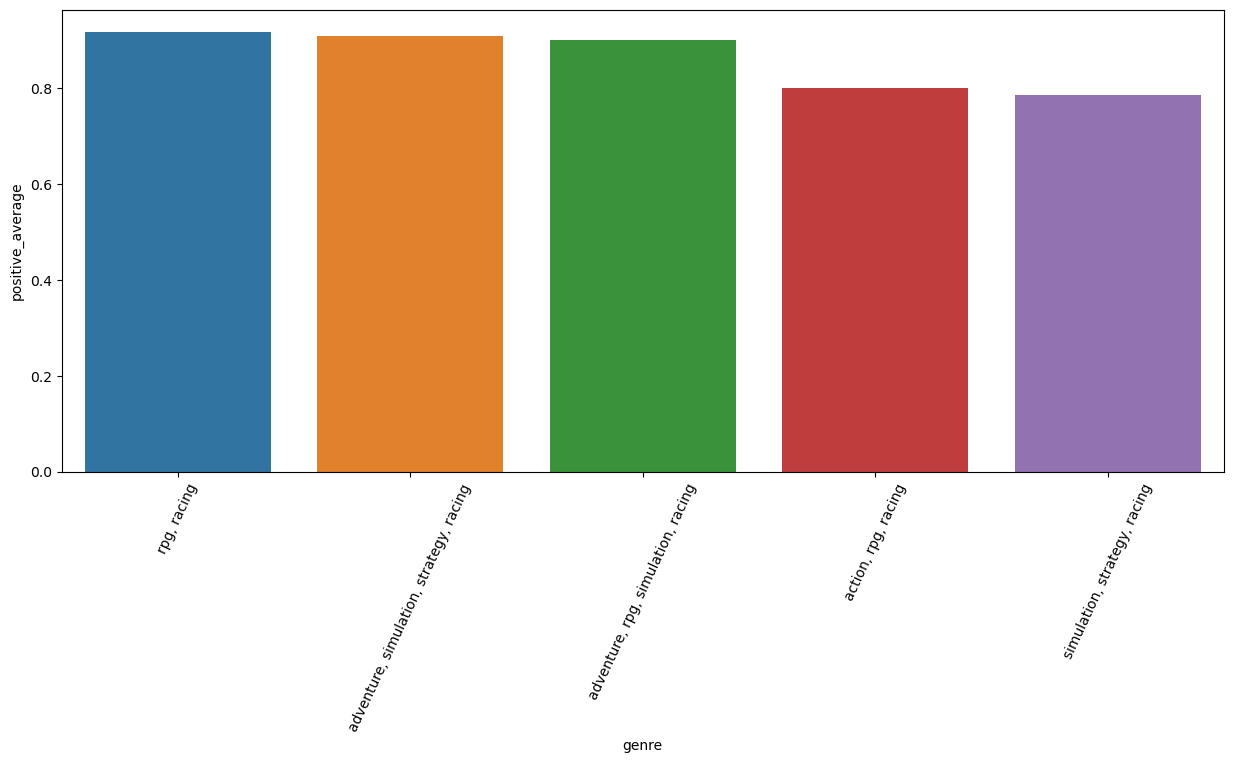

In [48]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=65)

sns.barplot(x='genre', y='positive_average', data=top_genre_ratigs)

plt.show()

## Cuánto ha ganado el desarrollador que más juegos ha vendido?

In [49]:
steam_df.head()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
0,Counter-Strike,2000-11-01,Valve,0,124534,3339,17612,7.19,15000000,True,False,False,False,False,False,False,False
1,Team Fortress Classic,1999-04-01,Valve,0,3318,633,277,3.99,7500000,True,False,False,False,False,False,False,False
2,Day of Defeat,2003-05-01,Valve,0,3416,398,187,3.99,7500000,True,False,False,False,False,False,False,False
3,Deathmatch Classic,2001-06-01,Valve,0,1273,267,258,3.99,7500000,True,False,False,False,False,False,False,False
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,0,5250,288,624,3.99,7500000,True,False,False,False,False,False,False,False


In [50]:
developers_df = steam_df[['developer', 'sells', 'price']].copy()

In [51]:
developers_df['total_income'] = developers_df['sells'] * developers_df['price']

In [52]:
grouped_developers = developers_df.groupby(
    'developer')['total_income'].sum().reset_index()

In [53]:
top_developers = grouped_developers.sort_values(by='total_income', ascending=False)[
    ['developer', 'total_income']][:5]

In [54]:
top_developers

,developer,total_income
10448,PUBG Corporation,2.024250e+09
15118,Valve,1.207110e+09
2265,"CAPCOM Co., Ltd.",5.757868e+08
1614,Bethesda Game Studios,5.141645e+08
11952,Rockstar North,3.769465e+08


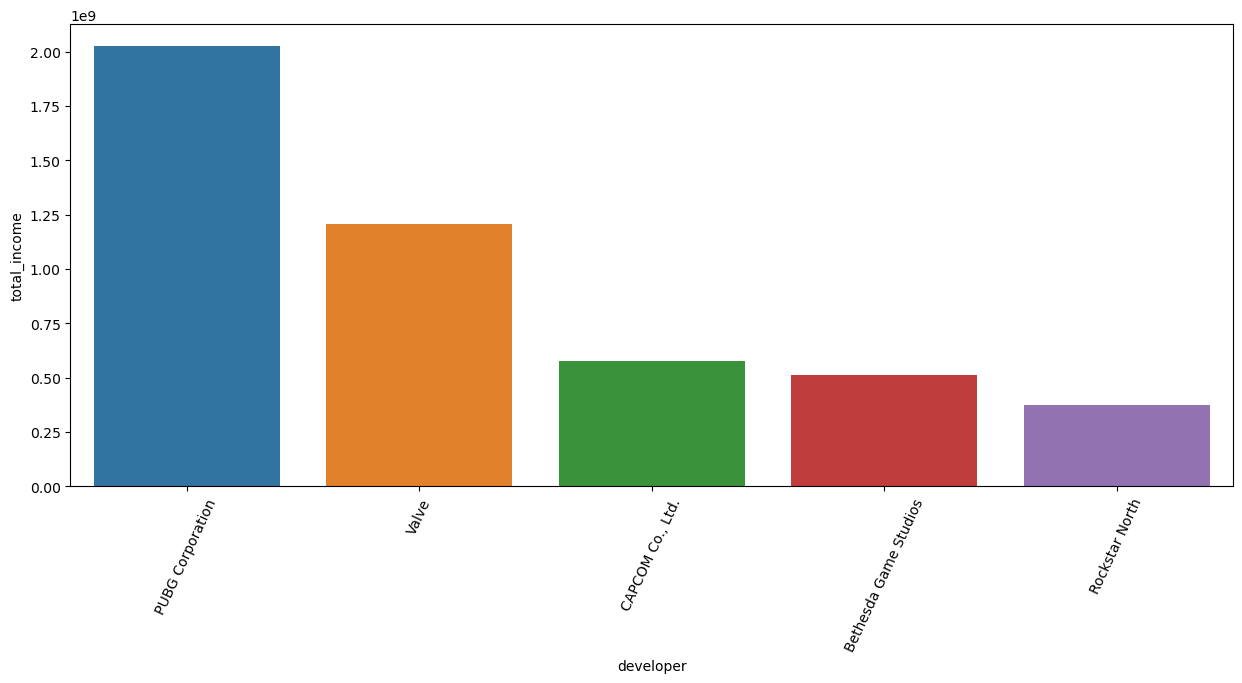

In [55]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=65)

sns.barplot(x='developer', y='total_income', data=top_developers)

plt.show()

## Cómo afecta a las reviews que un juego sea Early Access?

In [56]:
early_access_df = steam_df[['early_access',
                            'positive_ratings', 'negative_ratings']].copy()

In [57]:
early_access_df['total_ratings'] = early_access_df[[
    'positive_ratings', 'negative_ratings']].sum(axis=1)
early_access_df['negative_average'] = early_access_df['negative_ratings'] / \
    early_access_df['total_ratings']

In [58]:

early_access_grouped = early_access_df.groupby(
    "early_access")["negative_average"].mean().reset_index()

In [59]:
early_access_grouped['positive_average'] = 1 - \
    early_access_grouped['negative_average']

In [60]:
early_access_grouped.head()

,early_access,negative_average,positive_average
0,False,0.284042,0.715958
1,True,0.297611,0.702389


In [61]:
labels = ['positive', 'negative']
values = [0.715958, 0.284042]
values2 = [0.702389, 0.297611]

In [62]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [63]:
fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type": "pie"}, {"type": "pie"},]])

fig.add_trace(go.Pie(labels=labels, values=values,
              title='non early access'), row=1, col=1)
fig.add_trace(go.Pie(labels=labels, values=values2,
              title='early access'), row=1, col=2)


fig.show()

## Cuál es el desarrollador (o desarrolladores) que más tipos de juego y cantidad ha desarrollado?

In [64]:
genre_list = ['action', 'adventure', 'rpg', 'simulation', 'strategy', 'racing']

In [65]:
genre_df = steam_df[genre_list].copy()

In [66]:
genre_df['genre'] = genre_df.apply(
    lambda x: ', '.join(x.index[x]), axis=1)

In [67]:
devs_df = steam_df[['developer', 'name']].copy()

In [68]:
devs_df['genre'] = genre_df['genre']

In [69]:
devs_name_counts = devs_df.groupby('developer')['name'].count(
).sort_values(ascending=False)[:5].reset_index()

In [70]:
devs_df.drop_duplicates(
    subset=['developer', 'genre'], keep='first', inplace=True)

In [71]:
devs_df.reset_index(drop=True)

,developer,name,genre
0,Valve,Counter-Strike,action
1,Gearbox Software,Half-Life: Opposing Force,action
2,Valve,Dota 2,"action, strategy"
3,Valve,Portal 2,"action, adventure"
4,Valve;Hidden Path Entertainment,Counter-Strike: Global Offensive,action
...,...,...,...
21364,Velvet Paradise Games,The Mystery of Bikini Island,"adventure, rpg"
21365,Dnovel,CaptainMarlene,adventure
21366,SHEN JIAWEI,Room of Pandora,adventure
21367,Semyon Maximov,Cyber Gun,"action, adventure"


In [72]:
devs_genre_counts = devs_df.groupby('developer')['genre'].count(
).sort_values(ascending=False)[:5].reset_index()

In [74]:

fig = make_subplots(rows=1, cols=2, shared_yaxes=False,
                    specs=[[{"type": "bar"}, {"type": "bar"},]],
                    subplot_titles=("diversidad de generos", "cantidad de juegos"))

fig.add_trace(go.Bar(
    x=devs_genre_counts['developer'], y=devs_genre_counts['genre']), row=1, col=1)
fig.add_trace(go.Bar(
    x=devs_name_counts['developer'], y=devs_name_counts['name']), row=1, col=2)


fig.show()

## En qué mes, desde que tenemos datos, se han publicado más juegos?

In [75]:
release_df = steam_df[['release_date', 'name']].copy()

In [76]:
month_df = release_df.groupby(pd.Grouper(
    key='release_date', freq='M')).count().reset_index()

In [77]:
month_df = month_df.rename(columns={'name': 'games_count'})

In [78]:
fig = go.Figure(go.Scatter(
    x=month_df['release_date'], y=month_df['games_count']))
fig.show()

## Cuántas horas se juega de media a cada tipo de juego mensualmente?

In [79]:
avg_hr_df = steam_df[['release_date', 'avg_hours_per_user']].copy()

In [80]:
avg_hr_df['genre'] = genre_df['genre']

In [81]:
avg_hr_df = avg_hr_df.sort_values(
    by='release_date', ascending=False).reset_index()

In [82]:
avg_hr_grouped = avg_hr_df.groupby([pd.Grouper(key='release_date', freq='M'), 'genre']).agg({
    'avg_hours_per_user': 'sum'}).reset_index()

In [83]:
import plotly.express as px

In [84]:
fig = px.line(avg_hr_grouped, x='release_date',
              y='avg_hours_per_user', color='genre')
fig.show()

## Los juegos Free to Play tienen mejores o peores reviews?

In [85]:
free_to_play_df = steam_df[['free_to_play',
                            'positive_ratings', 'negative_ratings']].copy()

In [86]:
free_to_play_df['total_ratings'] = free_to_play_df[[
    'positive_ratings', 'negative_ratings']].sum(axis=1)
free_to_play_df['negative_average'] = free_to_play_df['negative_ratings'] / \
    free_to_play_df['total_ratings']

In [87]:

free_to_play_grouped = free_to_play_df.groupby(
    "free_to_play")["negative_average"].mean().reset_index()

In [88]:
free_to_play_grouped['positive_average'] = 1 - \
    free_to_play_grouped['negative_average']

In [89]:
free_to_play_grouped

,free_to_play,negative_average,positive_average
0,False,0.284513,0.715487
1,True,0.300546,0.699454


In [90]:
labels = ['positive', 'negative']
values = [0.715487, 0.284513]
values2 = [0.699454, 0.300546]

fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type": "pie"}, {"type": "pie"},]])

fig.add_trace(go.Pie(labels=labels, values=values,
              title='non free to play'), row=1, col=1)
fig.add_trace(go.Pie(labels=labels, values=values2,
              title='free to play'), row=1, col=2)

## Cómo ha evolucionado el número de achievements (trofeos) por juego?

## Bonus! Si tienes curiosidad, y quieres contestar más preguntas, puedes resolverlas aquí mismo!